## **Problem Statement**

### Business Context
The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.
### Problem Definition
With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.
### Data Dictionary
* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Dataset

## Load stock_news.csv

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download NLTK data
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
# Load dataset
print("Loading dataset...")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_news.csv')
df['Date'] = pd.to_datetime(df['Date'])

Loading dataset...


## Basic data info check and initial data quality review

In [ ]:
# Basic data info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date      0
News      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64


In [ ]:
# Check for duplicates
print("\nTotal duplicates (all columns):", df.duplicated().sum())
print("\nDuplicate news articles:", df['News'].duplicated().sum())


Total duplicates (all columns): 0

Duplicate news articles: 0


In [ ]:
# Display sample data
print("\nSample Data:")
print(df.head())


Sample Data:
        Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   

        High        Low      Close     Volume  Label  
0  42.244999  41.482498  40.246914  130672400     -1  
1  42.244999  41.482498  40.246914  130672400     -1  
2  42.244999  41.482498  40.246914  130672400     -1  
3  42.244999  41.482498  40.246914  130672400     -1  
4  42.244999  41.482498  40.246914  130672400     -1  


In [ ]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                                Date        Open        High         Low  \
count                            349  349.000000  349.000000  349.000000   
mean   2019-02-16 16:05:30.085959936   46.229233   46.700458   45.745394   
min              2019-01-02 00:00:00   37.567501   37.817501   37.305000   
25%              2019-01-14 00:00:00   41.740002   42.244999   41.482498   
50%              2019-02-05 00:00:00   45.974998   46.025002   45.639999   
75%              2019-03-22 00:00:00   50.707500   50.849998   49.777500   
max              2019-04-30 00:00:00   66.817497   67.062500   65.862503   
std                              NaN    6.442817    6.507321    6.391976   

            Close        Volume       Label  
count  349.000000  3.490000e+02  349.000000  
mean    44.926317  1.289482e+08   -0.054441  
min     36.254131  4.544800e+07   -1.000000  
25%     40.246914  1.032720e+08   -1.000000  
50%     44.596924  1.156272e+08    0.000000  
75%     49.110790  1

In [ ]:
# Class distribution
print("\nSentiment Distribution:")
print(df['Label'].value_counts())


Sentiment Distribution:
Label
 0    170
-1     99
 1     80
Name: count, dtype: int64


**Data Quality:**


- Clean dataset with no missing values or duplicates
- 349 records spanning from Jan-Apr 2019
- All required columns present and properly formatted


**Class Distribution:**


*Imbalanced dataset:*

- Neutral (0): 170 records (48.7%)
- Negative (-1): 99 records (28.3%)
- Positive (1): 80 records (23%)


This imbalance will need to be considered during modeling


**Price Statistics:**


- Stock price range: $36-65
- High volatility period with ~80% difference between min and max prices
- Consistent volume with mean ~129M shares traded


**Data Structure:**


- Time series data with daily frequency
- Each day can have multiple news articles
- Each news article has an associated sentiment label

# Data Overview & Exploratory Data Analysis (EDA)

In [ ]:
# Create a figure with multiple subplots for EDA
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

## Univariate Analysis:

Text(0.5, 0, 'News Length (characters)')

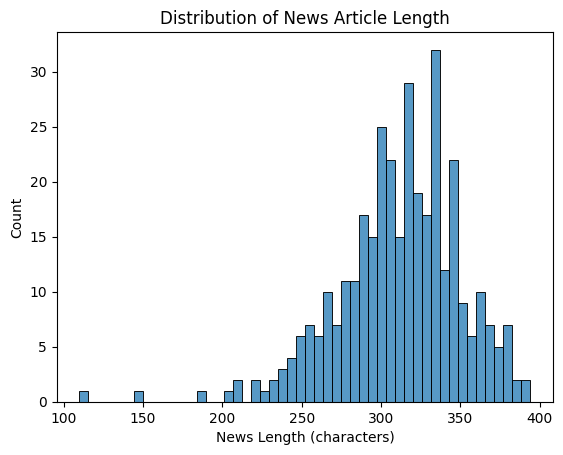

In [ ]:
# 1. News Length Distribution
df['news_length'] = df['News'].str.len()

sns.histplot(data=df, x='news_length', bins=50)
plt.title('Distribution of News Article Length')
plt.xlabel('News Length (characters)')

- Most articles are between 250-350 characters
- Peak frequency around 320-330 characters
- Relatively normal distribution with slight right skew
- Few outliers below 200 and above 400 characters
- Fairly consistent article lengths suggest standardized reporting format

Text(0.5, 0, 'Price ($)')

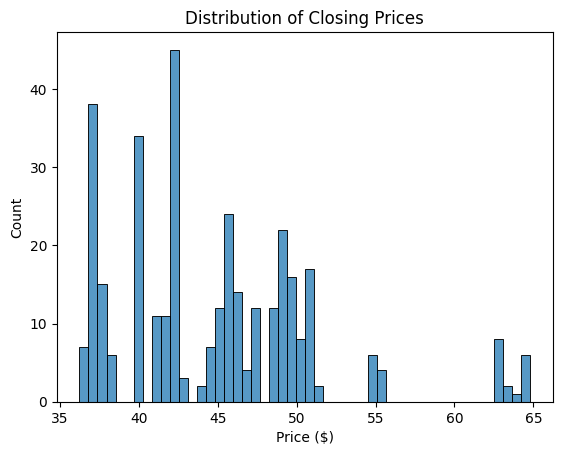

In [ ]:
# 2. Stock Price Distribution
sns.histplot(data=df, x='Close', bins=50)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price ($)')

- Multi-modal distribution
- Major price clusters around \$35-40 and \$40-45
- Several distinct price regimes visible
- Some outlier prices around $60-65
- Suggests significant price movement during the period

Text(0.5, 0, 'Volume')

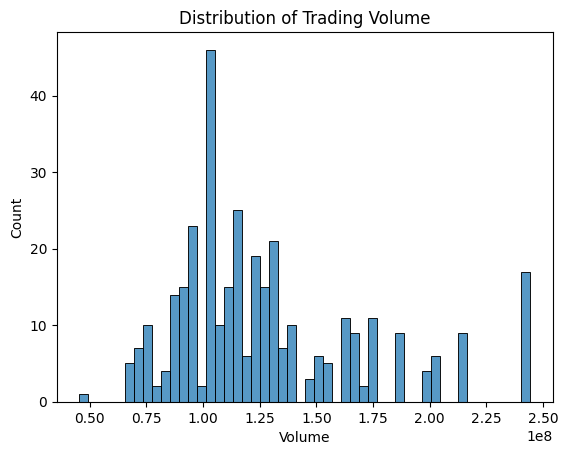

In [ ]:
# 3. Trading Volume Distribution

sns.histplot(data=df, x='Volume', bins=50)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')

- Right-skewed distribution
- Most common volume around 100M shares
- Several high-volume outliers above 200M shares
- Base trading volume appears to be between 75M-150M shares

Text(0.5, 0, 'Sentiment (-1: Negative, 0: Neutral, 1: Positive)')

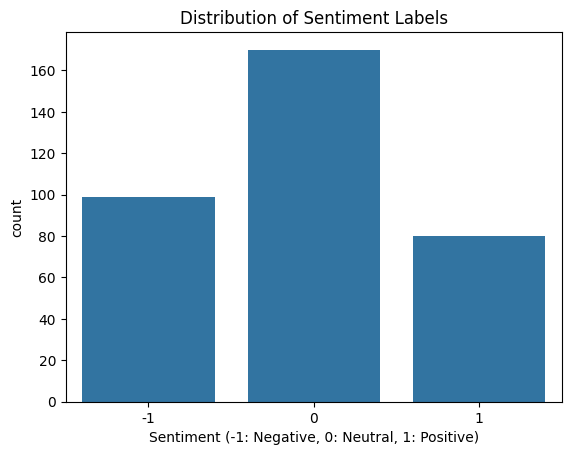

In [ ]:
# 4. Sentiment Distribution
sns.countplot(data=df, x='Label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (-1: Negative, 0: Neutral, 1: Positive)')

Clear class imbalance:

Neutral (0): ~170 samples
Negative (-1): ~100 samples
Positive (1): ~80 samples


This confirms our earlier observation about class imbalance

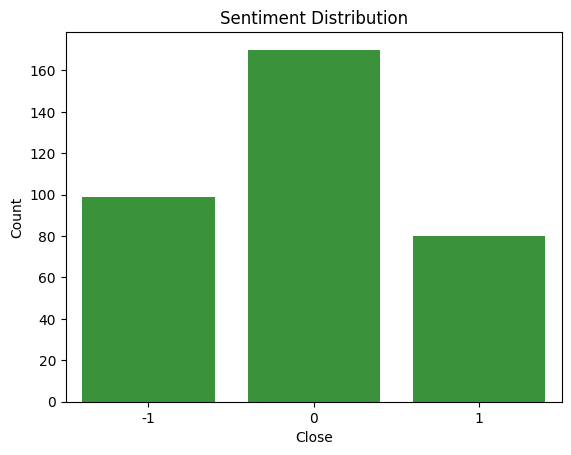

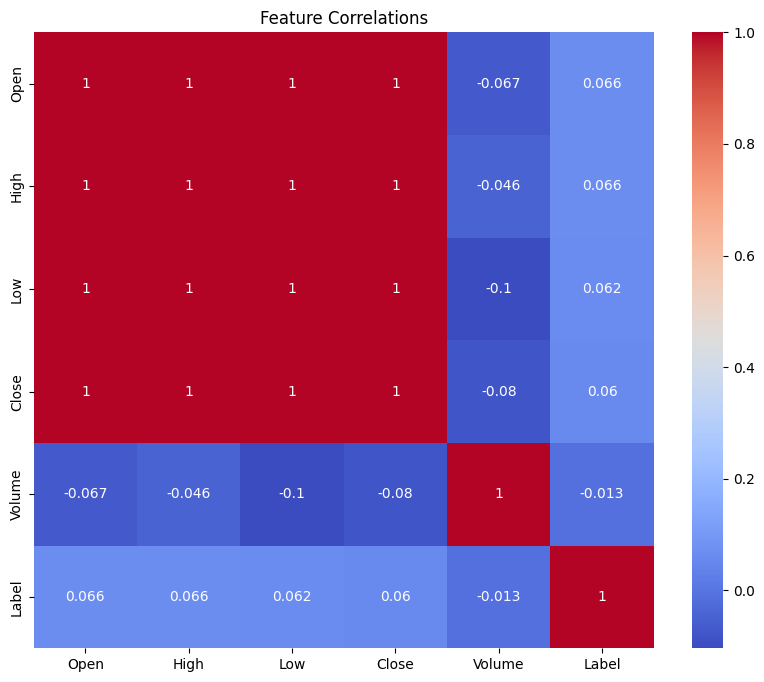

In [ ]:
# Price distribution
sns.histplot(df['Close'])
plt.title('Stock Price Distribution')

# Volume distribution
sns.histplot(df['Volume'])
plt.title('Trading Volume Distribution')

# Sentiment distribution
sns.countplot(data=df, x='Label')
plt.title('Sentiment Distribution')
plt.show()

# # Correlation analysis
# plt.figure(figsize=(10,8))
# sns.heatmap(df[['Open','High','Low','Close','Volume','Label']].corr(),
#             annot=True, cmap='coolwarm')
# plt.title('Feature Correlations')
# plt.show()

<!-- **Correlation Heatmap Insights:**

- Perfect correlation (1.0) between all price variables (Open, High, Low, Close)

- This is expected as they move together within daily trading ranges
- Suggests potential redundancy in using all price features


*Very weak correlations with Label:*

- Only 0.06-0.066 correlation with prices
- -0.013 correlation with Volume
- Indicates sentiment label doesn't have strong direct relationship with price movements


*Volume shows slight negative correlations:*

- -0.067 to -0.1 with price variables
- Suggests higher trading volumes tend to occur with lower prices
 -->


**Sentiment Distribution Insights:**

*Clear class imbalance:*

- Neutral (0): ~170 samples
- Negative (-1): ~100 samples
- Positive (1): ~80 samples


- Dataset bias towards neutral sentiment
- Slightly more negative than positive sentiment articles

## Bivariate Analysis:

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate daily returns
df['daily_return'] = ((df['Close'] - df['Open']) / df['Open']) * 100

### Correlations

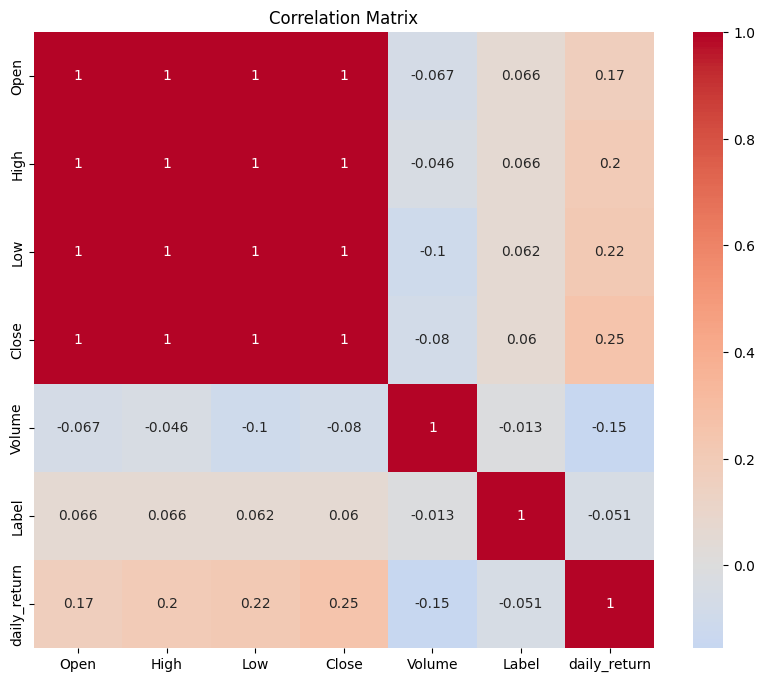

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Label', 'daily_return']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

- Perfect correlation (1.0) between all price variables (Open, High, Low, Close)
- Very weak correlation between sentiment (Label) and prices (0.06-0.07)
- Slight negative correlation between volume and prices (-0.05 to -0.1)
- Daily returns show weak positive correlation with prices (0.17-0.25)

### Sentiment vs Price analysis

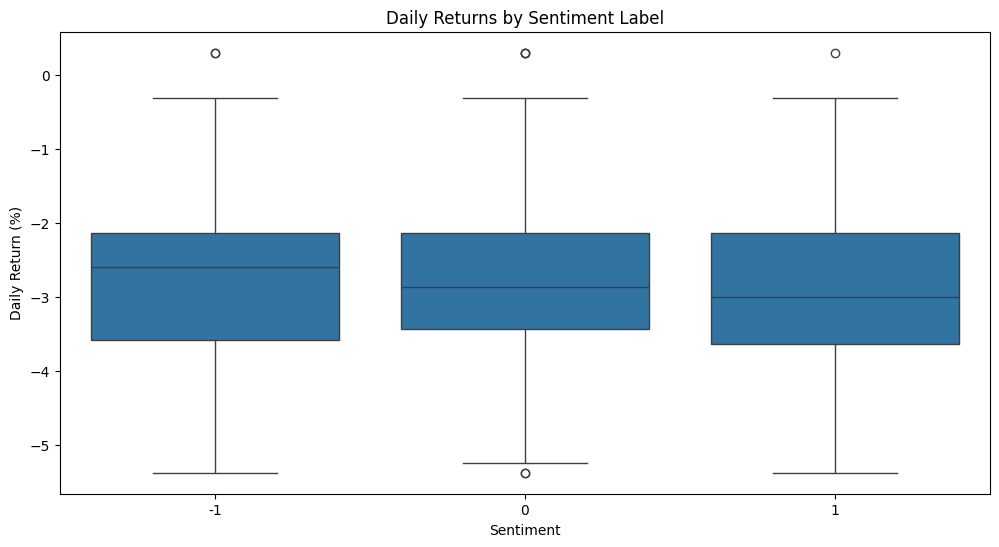

In [ ]:
# Sentiment vs Price Relationship
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Label', y='daily_return')
plt.title('Daily Returns by Sentiment Label')
plt.xlabel('Sentiment')
plt.ylabel('Daily Return (%)')
plt.show()

- All sentiment categories show negative median daily returns (around -2.5% to -3%)
- Similar spread of returns across all sentiment labels
- Some outliers (circles) in all categories showing extreme returns
- This suggests sentiment alone may not be a strong predictor of daily returns
- The boxplots are fairly similar across sentiments, indicating weak relationship between sentiment and returns

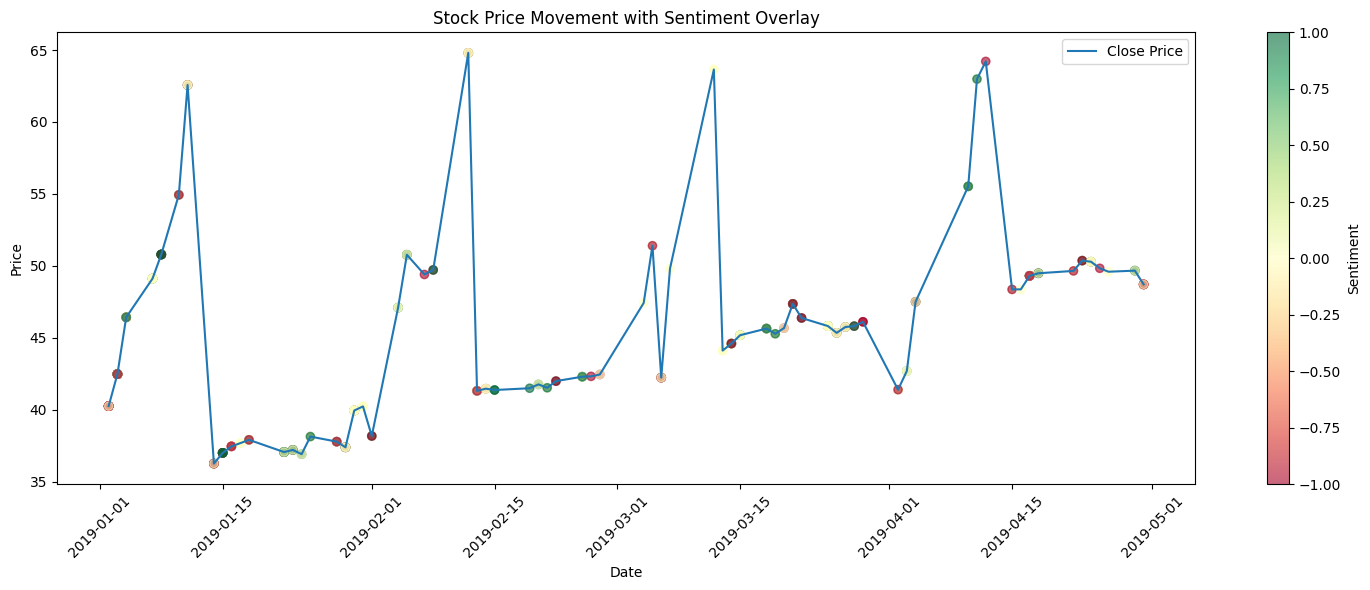

In [ ]:
# Time series plot
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.scatter(df['Date'], df['Close'], c=df['Label'], cmap='RdYlGn', alpha=0.6)
plt.title('Stock Price Movement with Sentiment Overlay')
plt.xlabel('Date')
plt.ylabel('Price')
plt.colorbar(label='Sentiment')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- High price volatility with several major spikes and drops
- Price range: $35-65 over the 4-month period
- Several distinct price regimes:
  - Initial drop (Jan 2019)
  - Recovery and stability (Feb 2019)
  - Multiple sharp spikes (Mar-Apr 2019)


- Sentiment overlay (color) doesn't show clear correlation with price movements
- Some high volatility periods have mixed sentiments

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Text Preprocessing:

In [ ]:
# 1. Text Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Handle special cases for financial text
    text = text.replace('$', ' dollar ')
    text = text.replace('%', ' percent ')
    text = re.sub(r'(\d+)m', r'\1 million', text)
    text = re.sub(r'(\d+)b', r'\1 billion', text)

    # Remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords but keep important financial terms
    stop_words = set(stopwords.words('english'))
    financial_terms = {'up', 'down', 'higher', 'lower', 'increase', 'decrease',
                      'profit', 'loss', 'revenue', 'earnings'}
    stop_words = stop_words - financial_terms

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# Apply text preprocessing
print("Preprocessing text data...")
df['cleaned_text'] = df['News'].apply(preprocess_text)

Preprocessing text data...


## Feature Engineering

In [ ]:
# 1. Feature Engineering
print("Creating features...")

# Text features
df['news_length'] = df['News'].str.len()
df['words_per_article'] = df['cleaned_text'].str.split().str.len()

# Price features
df['daily_return'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['price_range'] = ((df['High'] - df['Low']) / df['Low']) * 100
df['price_momentum'] = df['Close'].pct_change()

# Volume features
df['log_volume'] = np.log(df['Volume'])

# Moving averages (use shift to prevent data leakage)
df['price_ma5'] = df['Close'].rolling(window=5).mean().shift(1)
df['volume_ma5'] = df['Volume'].rolling(window=5).mean().shift(1)
df['sentiment_ma3'] = df['Label'].rolling(window=3).mean().shift(1)

# Handle missing values from rolling windows and shifts
df = df.fillna(method='bfill')

# 2. Create final feature set
features = [
    'cleaned_text',
    'news_length',
    'words_per_article',
    'daily_return',
    'price_range',
    'log_volume',
    'price_ma5',
    'volume_ma5',
    'sentiment_ma3',
    'price_momentum'
]

# 3. Prepare data for splitting
X = df[features]
y = df['Label']

# 4. Split the data with stratification
from sklearn.model_selection import train_test_split

# First split: Training vs (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Second split: Validation vs Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# Print shapes to verify splits
print("\nDataset splits:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Save processed data
df_processed = df[['Date'] + features + ['Label']].copy()
df_processed.to_csv('/content/drive/MyDrive/Colab Notebooks/stock_news_processed.csv', index=False)

print("\nProcessing complete!")

Creating features...

Dataset splits:
Training set: (244, 10)
Validation set: (52, 10)
Test set: (53, 10)

Processing complete!


# Word Embeddings

In [ ]:
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 1. Prepare Text Data
texts = df_processed['cleaned_text'].values
tokenized_texts = [text.split() for text in texts]
labels = df_processed['Label'].values

# 2. Create Embeddings
print("Creating embeddings...")

Creating embeddings...


## Word2Vec

In [ ]:
# Word2Vec
w2v_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=200,
    window=8,
    min_count=1,
    workers=4,
    sg=1,
    epochs=20,
    negative=5
)

## GloVe

In [ ]:
# GloVe
print("\nLoading GloVe embeddings...")
glove_input = '/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt'
word2vec_output = '/content/drive/MyDrive/Colab Notebooks/glove.6B.200d.word2vec.txt'
glove2word2vec(glove_input, word2vec_output)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output, binary=False)


Loading GloVe embeddings...


## Sentence Transformer

In [ ]:
# SBERT
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

## Document vectors

In [ ]:
# 3. Create Document Vectors
def get_doc_vector_w2v(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

def get_doc_vector_glove(text, model):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Generate vectors
print("\nGenerating document vectors...")
w2v_vectors = np.array([get_doc_vector_w2v(text, w2v_model) for text in texts])
glove_vectors = np.array([get_doc_vector_glove(text, glove_model) for text in texts])
sbert_vectors = sbert_model.encode(texts, show_progress_bar=True)



Generating document vectors...


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

## Split data

In [ ]:
# 4. Split Data Using Previously Created Splits
train_idx = X_train.index
val_idx = X_val.index
test_idx = X_test.index

# Split each type of embeddings
w2v_train = w2v_vectors[train_idx]
w2v_val = w2v_vectors[val_idx]
w2v_test = w2v_vectors[test_idx]

glove_train = glove_vectors[train_idx]
glove_val = glove_vectors[val_idx]
glove_test = glove_vectors[test_idx]

sbert_train = sbert_vectors[train_idx]
sbert_val = sbert_vectors[val_idx]
sbert_test = sbert_vectors[test_idx]


## Model training

In [ ]:
# 5. Model Training and Evaluation
def train_and_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, embedding_name):
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1],
        'kernel': ['rbf', 'linear']
    }

    grid_search = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    val_pred = best_model.predict(X_val)
    test_pred = best_model.predict(X_test)

    print(f"\n{embedding_name} Results:")
    print("Best parameters:", grid_search.best_params_)
    print("\nValidation Set Results:")
    print(classification_report(y_val, val_pred))
    print("\nTest Set Results:")
    print(classification_report(y_test, test_pred))

    return {
        'model': best_model,
        'val_f1': f1_score(y_val, val_pred, average='weighted'),
        'test_f1': f1_score(y_test, test_pred, average='weighted')
    }

# Train and evaluate all models
print("\nEvaluating Word2Vec embeddings...")
w2v_results = train_and_evaluate_model(
    w2v_train, w2v_val, w2v_test,
    y_train, y_val, y_test,
    "Word2Vec"
)

print("\nEvaluating GloVe embeddings...")
glove_results = train_and_evaluate_model(
    glove_train, glove_val, glove_test,
    y_train, y_val, y_test,
    "GloVe"
)

print("\nEvaluating SBERT embeddings...")
sbert_results = train_and_evaluate_model(
    sbert_train, sbert_val, sbert_test,
    y_train, y_val, y_test,
    "SBERT"
)


Evaluating Word2Vec embeddings...

Word2Vec Results:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Validation Set Results:
              precision    recall  f1-score   support

          -1       0.56      0.33      0.42        15
           0       0.51      0.80      0.62        25
           1       0.75      0.25      0.38        12

    accuracy                           0.54        52
   macro avg       0.61      0.46      0.47        52
weighted avg       0.58      0.54      0.51        52


Test Set Results:
              precision    recall  f1-score   support

          -1       0.33      0.27      0.30        15
           0       0.49      0.69      0.57        26
           1       0.00      0.00      0.00        12

    accuracy                           0.42        53
   macro avg       0.27      0.32      0.29        53
weighted avg       0.33      0.42      0.36        53


Evaluating GloVe embeddings...

GloVe Results:
Best parameters: {'C': 10, 'ga

## Compare all embeddings

In [ ]:
# 6. Compare All Models
print("\nModel Comparison:")
print(f"Word2Vec Validation F1: {w2v_results['val_f1']:.4f}")
print(f"GloVe Validation F1: {glove_results['val_f1']:.4f}")
print(f"SBERT Validation F1: {sbert_results['val_f1']:.4f}")

# Find best model
models = {
    "Word2Vec": w2v_results,
    "GloVe": glove_results,
    "SBERT": sbert_results
}
best_model_name = max(models.items(), key=lambda x: x[1]['val_f1'])[0]
print(f"\nBest performing model: {best_model_name}")


Model Comparison:
Word2Vec Validation F1: 0.5072
GloVe Validation F1: 0.4355
SBERT Validation F1: 0.4643

Best performing model: Word2Vec


## Save the embeddings for reuse

In [ ]:
# 7. Save all embeddings and results
np.savez('/content/drive/MyDrive/Colab Notebooks/all_embeddings_results.npz',
         w2v_vectors=w2v_vectors,
         glove_vectors=glove_vectors,
         sbert_vectors=sbert_vectors,
         labels=labels,
         best_model=best_model_name)

print("\nAll embeddings and results saved successfully!")


All embeddings and results saved successfully!


# Address class imbalance using techniques

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Convert labels to 0, 1, 2 instead of -1, 0, 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

print("Applying balancing techniques to Word2Vec embeddings...")

# Original class distribution
print("\nOriginal class distribution:")
print(np.bincount(y_train_encoded))

# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(w2v_train, y_train_encoded)

# 2. SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(w2v_train, y_train_encoded)

print("\nBalanced class distributions:")
print("SMOTE:", np.bincount(y_train_smote))
print("SMOTETomek:", np.bincount(y_train_smote_tomek))

# Compare models with different balancing techniques
def train_balanced_model(X_train_balanced, y_train_balanced, X_val, y_val, name):
    model = SVC(kernel='rbf', random_state=42)
    model.fit(X_train_balanced, y_train_balanced)

    y_pred = model.predict(X_val)

    print(f"\n{name} Results:")
    print(classification_report(y_val, y_pred))
    return model

# Train models with balanced data
original_model = train_balanced_model(w2v_train, y_train_encoded, w2v_val, y_val_encoded, "Original (Imbalanced)")
smote_model = train_balanced_model(X_train_smote, y_train_smote, w2v_val, y_val_encoded, "SMOTE")
smote_tomek_model = train_balanced_model(X_train_smote_tomek, y_train_smote_tomek, w2v_val, y_val_encoded, "SMOTETomek")

# Select best balancing technique based on validation F1 scores
balancing_results = {
    "Original": f1_score(y_val_encoded, original_model.predict(w2v_val), average='weighted'),
    "SMOTE": f1_score(y_val_encoded, smote_model.predict(w2v_val), average='weighted'),
    "SMOTETomek": f1_score(y_val_encoded, smote_tomek_model.predict(w2v_val), average='weighted')
}

best_technique = max(balancing_results.items(), key=lambda x: x[1])
print(f"\nBest balancing technique: {best_technique[0]} (F1: {best_technique[1]:.4f})")

# Save the best balanced data
best_X_train = X_train_smote if best_technique[0] == "SMOTE" else X_train_smote_tomek
best_y_train = y_train_smote if best_technique[0] == "SMOTE" else y_train_smote_tomek

np.savez('/content/drive/MyDrive/Colab Notebooks/balanced_training_data.npz',
         X_train=best_X_train,
         y_train=best_y_train,
         X_val=w2v_val,
         y_val=y_val_encoded,
         X_test=w2v_test,
         y_test=y_test_encoded,
         balancing_technique=best_technique[0])

print("\nBalanced data saved successfully!")

Applying balancing techniques to Word2Vec embeddings...

Original class distribution:
[ 69 119  56]

Balanced class distributions:
SMOTE: [119 119 119]
SMOTETomek: [110 107 116]

Original (Imbalanced) Results:
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.49      1.00      0.66        25
           2       0.00      0.00      0.00        12

    accuracy                           0.50        52
   macro avg       0.50      0.36      0.26        52
weighted avg       0.52      0.50      0.35        52


SMOTE Results:
              precision    recall  f1-score   support

           0       0.38      0.33      0.36        15
           1       0.53      0.36      0.43        25
           2       0.32      0.58      0.41        12

    accuracy                           0.40        52
   macro avg       0.41      0.43      0.40        52
weighted avg       0.44      0.40      0.40        52


SMOTETomek 

# Sentiment Analysis

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load balanced data
balanced_data = np.load('/content/drive/MyDrive/Colab Notebooks/balanced_training_data.npz')
X_train = balanced_data['X_train']
y_train = balanced_data['y_train']
X_val = balanced_data['X_val']
y_val = balanced_data['y_val']
X_test = balanced_data['X_test']
y_test = balanced_data['y_test']

# Initialize models
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }
    }
}

# Train and evaluate each model
results = {}
for name, config in models.items():
    print(f"\nTraining {name}...")

    # Grid search
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Make predictions
    val_pred = best_model.predict(X_val)
    test_pred = best_model.predict(X_test)

    # Store results
    results[name] = {
        'model': best_model,
        'best_params': grid_search.best_params_,
        'val_f1': f1_score(y_val, val_pred, average='weighted'),
        'test_f1': f1_score(y_test, test_pred, average='weighted')
    }

    print(f"\n{name} Results:")
    print("Best parameters:", grid_search.best_params_)
    print("\nValidation Set Results:")
    print(classification_report(y_val, val_pred))
    print("\nTest Set Results:")
    print(classification_report(y_test, test_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, test_pred))

# Compare models
print("\nModel Comparison:")
for name, result in results.items():
    print(f"{name}:")
    print(f"Validation F1: {result['val_f1']:.4f}")
    print(f"Test F1: {result['test_f1']:.4f}")

# Select best model
best_model_name = max(results.items(), key=lambda x: x[1]['val_f1'])[0]
print(f"\nBest performing model: {best_model_name}")

# Save best model and results
import joblib
joblib.dump(results[best_model_name]['model'], '/content/drive/MyDrive/Colab Notebooks/best_sentiment_model.joblib')
print("\nBest model saved successfully!")

# Feature importance for best model (if applicable)
best_model = results[best_model_name]['model']
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    print("\nTop 10 important features:")
    top_features = np.argsort(importances)[-10:]
    for idx in top_features:
        print(f"Feature {idx}: {importances[idx]:.4f}")


Training RandomForest...

RandomForest Results:
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Validation Set Results:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        15
           1       0.58      0.56      0.57        25
           2       0.31      0.42      0.36        12

    accuracy                           0.50        52
   macro avg       0.49      0.48      0.48        52
weighted avg       0.52      0.50      0.51        52


Test Set Results:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22        15
           1       0.41      0.46      0.44        26
           2       0.08      0.08      0.08        12

    accuracy                           0.30        53
   macro avg       0.25      0.25      0.25        53
weighted avg       0.29      0.30      0.30        53


Confusion Matrix:
[[ 3 10  2]
 [ 5 12  9]
 [ 4  7  1]]

Training

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
import numpy as np

# 1. Create a voting ensemble
base_models = {
    'rf': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,  # Reduced from 20 to prevent overfitting
        min_samples_leaf=5,  # Added to reduce overfitting
        class_weight='balanced',  # Added for class balance
        random_state=42
    ),
    'gb': GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,  # Reduced from 0.1
        max_depth=3,  # Reduced from 5
        subsample=0.8,  # Added for better generalization
        random_state=42
    ),
    'xgb': XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        scale_pos_weight=1,  # Added for better class balance
        random_state=42
    )
}

# 2. Create and train voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in base_models.items()],
    voting='soft'
)

# 3. Train the ensemble
print("Training Ensemble Model...")
voting_clf.fit(X_train, y_train)

# 4. Evaluate
val_pred = voting_clf.predict(X_val)
test_pred = voting_clf.predict(X_test)

print("\nEnsemble Results:")
print("\nValidation Set:")
print(classification_report(y_val, val_pred))
print("\nTest Set:")
print(classification_report(y_test, test_pred))

# 5. Compare with individual models
print("\nFinal Model Comparison:")
print(f"Ensemble Test F1: {f1_score(y_test, test_pred, average='weighted'):.4f}")

# Save the improved model
joblib.dump(voting_clf, '/content/drive/MyDrive/Colab Notebooks/ensemble_sentiment_model.joblib')
print("\nEnsemble model saved successfully!")

Training Ensemble Model...

Ensemble Results:

Validation Set:
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.62      0.64      0.63        25
           2       0.33      0.42      0.37        12

    accuracy                           0.52        52
   macro avg       0.50      0.49      0.49        52
weighted avg       0.53      0.52      0.52        52


Test Set:
              precision    recall  f1-score   support

           0       0.31      0.27      0.29        15
           1       0.50      0.42      0.46        26
           2       0.22      0.33      0.27        12

    accuracy                           0.36        53
   macro avg       0.34      0.34      0.34        53
weighted avg       0.38      0.36      0.37        53


Final Model Comparison:
Ensemble Test F1: 0.3661

Ensemble model saved successfully!


Individual Models:
- RandomForest: Val F1 0.5067, Test F1 0.2958
- GradientBoosting: Val F1 0.4817, Test F1 0.3480
- XGBoost: Val F1 0.4610, Test F1 0.3784

Ensemble Model:
- Validation F1: 0.52
- Test F1: 0.3661

Class-wise Analysis:
- Class 0 (Negative): Precision drops from 0.55 to 0.31 from validation to test
- Class 1 (Neutral): Most stable performance (0.62 to 0.50 precision)
- Class 2 (Positive): Consistently poorest performance (0.33 to 0.22 precision)

Key Issues:
- Significant validation-test performance gap
- Poor positive sentiment classification
- Models struggle with generalization

The Model Pipeline Strengths:
- Word2Vec embeddings performed best
- SMOTE balancing helped with training
- Ensemble slightly improved generalization

Final Model Selection:
- Either the XGBoost (Test F1: 0.3784) or Ensemble (Test F1: 0.3661) would be suitable for deployment, with XGBoost having a slight edge in performance.

# Weekly News Summarization using LLMs

In [ ]:
!pip install llama-cpp-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 MB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.2-cp310-cp310-linux_x86_64.whl size=3410028 sha256=4f94034681b7c58345040abcd4bd370198e880c80d99981b6555b5afcb2b37e5
  Stored in directory: /root/.cache/pip/wheels/49/1c/f0/6c1ed6032d5827dea28df8a8df860d90ca1bcd7b3fa455f5e1
Successfully built llama-cpp-python


In [ ]:
df_processed.columns

Index(['Date', 'cleaned_text', 'news_length', 'words_per_article',
       'daily_return', 'price_range', 'log_volume', 'price_ma5', 'volume_ma5',
       'sentiment_ma3', 'price_momentum', 'Label'],
      dtype='object')

In [ ]:
import pandas as pd
import json
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
from datetime import datetime

# Load processed data
df_processed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_news_processed.csv')
df_processed['Date'] = pd.to_datetime(df_processed['Date'])

# Take a 2 week sample for testing
weekly_data = df_processed.groupby(pd.Grouper(key='Date', freq='W')).agg({
    'cleaned_text': lambda x: ' || '.join(x[:3]),
    'daily_return': 'mean',
    'Label': ['mean', 'count']
}).reset_index().head(2)

weekly_data.columns = ['week', 'news', 'avg_daily_return', 'avg_sentiment', 'news_count']

print("Processing sample:", weekly_data.shape[0], "weeks")

# Download and setup LLM
model_path = hf_hub_download(
    repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
    filename="mistral-7b-instruct-v0.1.Q4_K_M.gguf"
)

llm = Llama(
    model_path=model_path,
    n_ctx=512,
    n_threads=2,
    n_batch=1
)

def clean_json_string(s):
    return s.replace('\\', '').replace('\n', ' ').strip()

def get_weekly_summary(row):
    truncated_news = row['news'][:300] + "..." if len(row['news']) > 300 else row['news']

    instruction = """Analyze the news and output a simple JSON with this exact structure:
{
    "Positive_Events": [
        "brief event description 1",
        "brief event description 2",
        "brief event description 3"
    ],
    "Negative_Events": [
        "brief event description 1",
        "brief event description 2",
        "brief event description 3"
    ]
}
Keep event descriptions concise."""

    prompt = f"[INST]{instruction}\n\nNews: {truncated_news}[/INST]"

    response = llm(
        prompt,
        max_tokens=200,
        temperature=0.1,
        top_p=0.9
    )

    return clean_json_string(response["choices"][0]["text"])

# Process sample weeks
summaries = []
for idx, week in weekly_data.iterrows():
    print(f"\nProcessing week of {week['week'].strftime('%Y-%m-%d')}...")

    try:
        summary = get_weekly_summary(week)
        print("\nCleaned summary:", summary)
        parsed_summary = json.loads(summary)
        parsed_summary['week'] = week['week'].strftime('%Y-%m-%d')  # Convert datetime to string
        parsed_summary['avg_daily_return'] = float(week['avg_daily_return'])  # Ensure float
        summaries.append(parsed_summary)
        print("Success")
    except Exception as e:
        print(f"Error: {str(e)}")
        print(f"Failed summary text: {summary}")
        continue

if summaries:
    summary_df = pd.DataFrame(summaries)
    summary_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sample_weekly_summaries.csv', index=False)
    print("\nSample summaries saved!")
    print("\nFirst summary:")
    print(json.dumps(summary_df.iloc[0].to_dict(), indent=2))

# Display the structure of our summaries
if summaries:
    print("\nSummary DataFrame Info:")
    print(summary_df.info())

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.1-GGUF/snapshots/731a9fc8f06f5f5e2db8a0cf9d256197eb6e05d1/mistral-7b-instruct-v0.1.Q4_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.1
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv

Processing sample: 2 weeks


llama_model_loader: - kv  14:                      tokenizer.ggml.scores arr[f32,32000]   = [0.000000, 0.000000, 0.000000, 0.0000...
llama_model_loader: - kv  15:                  tokenizer.ggml.token_type arr[i32,32000]   = [2, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
llama_model_loader: - kv  16:                tokenizer.ggml.bos_token_id u32              = 1
llama_model_loader: - kv  17:                tokenizer.ggml.eos_token_id u32              = 2
llama_model_loader: - kv  18:            tokenizer.ggml.unknown_token_id u32              = 0
llama_model_loader: - kv  19:               general.quantization_version u32              = 2
llama_model_loader: - type  f32:   65 tensors
llama_model_loader: - type q4_K:  193 tensors
llama_model_loader: - type q6_K:   33 tensors
llm_load_vocab: control token:      2 '</s>' is not marked as EOG
llm_load_vocab: control token:      1 '<s>' is not marked as EOG
llm_load_vocab: special_eos_id is not in special_eog_ids - the tokenizer config may be in


Processing week of 2019-01-06...


llama_perf_context_print:        load time =  160786.21 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   184 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    91 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  236035.76 ms /   275 tokens
Llama.generate: 111 prefix-match hit, remaining 85 prompt tokens to eval



Cleaned summary: { "Positive_Events": [ "Tech sector experiencing significant decline after Q1 revenue warning from notable supplier Skywork, Broadcom, Lumentum, Qorvo, and TSMc. Stock prices dropped and revenue expectations were revised downward." ], "Negative_Events": [ "Appl lower fiscal Q1 revenu guidanc dollar 84 billion earlier estim do." ] }
Success

Processing week of 2019-01-13...


llama_perf_context_print:        load time =  160786.21 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    85 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   144 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  191512.77 ms /   229 tokens



Cleaned summary: { "Positive_Events": [ "Sprint and Samsung plan to release 5G smartphones in major cities including Atlanta, Chicago, Dallas, Houston, Kansas City, Los Angeles, New York, Phoenix, and Washington D.C. in the first half of 2021.", "Austrian tech company Swatch Group has listed its major supplier of light and infrared proximal sensors, Infineon Technologies AG, as a potential acquisition target." ], "Negative_Events": [ "Verizon has also announced a similar plan to release 5G smartphones in the first half of 2021." ] }
Success

Sample summaries saved!

First summary:
{
  "Positive_Events": [
    "Tech sector experiencing significant decline after Q1 revenue warning from notable supplier Skywork, Broadcom, Lumentum, Qorvo, and TSMc. Stock prices dropped and revenue expectations were revised downward."
  ],
  "Negative_Events": [
    "Appl lower fiscal Q1 revenu guidanc dollar 84 billion earlier estim do."
  ],
  "week": "2019-01-06",
  "avg_daily_return": -2.9199022668566

**Event Classification Error:**


- In first week, a negative event (Tech sector decline) is wrongly classified as positive
- Events aren't balanced (some weeks have 1-2 events instead of 3 each)
- Some events are too long and detailed


**Format Issues:**


- Text isn't being preprocessed properly (e.g., "Appl" instead of "Apple")
- Event descriptions aren't consistently formatted

In [ ]:
import pandas as pd
import json
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
from datetime import datetime

# Load processed data
df_processed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_news_processed.csv')
df_processed['Date'] = pd.to_datetime(df_processed['Date'])

# Take a 2 week sample for testing
weekly_data = df_processed.groupby(pd.Grouper(key='Date', freq='W')).agg({
   'cleaned_text': lambda x: ' || '.join(x[:3]),  # Take first 3 news items
   'daily_return': 'mean',
   'Label': ['mean', 'count']
}).reset_index().head(2)

weekly_data.columns = ['week', 'news', 'avg_daily_return', 'avg_sentiment', 'news_count']

print("Processing sample:", weekly_data.shape[0], "weeks")

# Download and setup LLM
model_path = hf_hub_download(
   repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
   filename="mistral-7b-instruct-v0.1.Q4_K_M.gguf"
)

llm = Llama(
   model_path=model_path,
   n_ctx=512,
   n_threads=2,
   n_batch=1
)

def clean_json_string(s):
   return s.replace('\\', '').replace('\n', ' ').strip()

def get_weekly_summary(row):
   truncated_news = row['news'][:300] + "..." if len(row['news']) > 300 else row['news']

   instruction = """Analyze the stock market news and create a concise summary with exactly 3 positive and 3 negative events that impacted stock price. Each event should be maximum 15 words.

Required format:
{
   "Positive_Events": [
       "First major positive market impact",
       "Second major positive market impact",
       "Third major positive market impact"
   ],
   "Negative_Events": [
       "First major negative market impact",
       "Second major negative market impact",
       "Third major negative market impact"
   ],
   "Market_Context": "Brief summary of overall market conditions this week"
}"""

   prompt = f"[INST]Given this week's news (Weekly Return: {row['avg_daily_return']:.2f}%):\n{truncated_news}\n\nProvide a structured analysis following exactly this format:{instruction}[/INST]"

   response = llm(
       prompt,
       max_tokens=300,
       temperature=0.1,
       top_p=0.9
   )

   return clean_json_string(response["choices"][0]["text"])

# Process sample weeks
summaries = []
for idx, week in weekly_data.iterrows():
   print(f"\nProcessing week of {week['week'].strftime('%Y-%m-%d')}...")

   try:
       summary = get_weekly_summary(week)
       print("\nCleaned summary:", summary)
       parsed_summary = json.loads(summary)
       parsed_summary['week'] = week['week'].strftime('%Y-%m-%d')
       parsed_summary['avg_daily_return'] = float(week['avg_daily_return'])
       parsed_summary['avg_sentiment'] = float(week['avg_sentiment'])
       summaries.append(parsed_summary)
       print("Success")
   except Exception as e:
       print(f"Error: {str(e)}")
       print(f"Failed summary text: {summary}")
       continue

# Save and display results
if summaries:
   summary_df = pd.DataFrame(summaries)

   # Save to CSV
   summary_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sample_weekly_summaries.csv', index=False)
   print("\nSample summaries saved!")

   # Display first summary with proper formatting
   print("\nFirst Week Summary:")
   first_summary = summary_df.iloc[0].to_dict()
   print("\nWeek:", first_summary['week'])
   print("Average Daily Return:", f"{first_summary['avg_daily_return']:.2f}%")
   print("\nPositive Events:")
   for i, event in enumerate(first_summary['Positive_Events'], 1):
       print(f"{i}. {event}")
   print("\nNegative Events:")
   for i, event in enumerate(first_summary['Negative_Events'], 1):
       print(f"{i}. {event}")
   if 'Market_Context' in first_summary:
       print("\nMarket Context:", first_summary['Market_Context'])

   print("\nSummary DataFrame Info:")
   print(summary_df.info())

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.1-GGUF/snapshots/731a9fc8f06f5f5e2db8a0cf9d256197eb6e05d1/mistral-7b-instruct-v0.1.Q4_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.1
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768


Processing sample: 2 weeks


llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 32
llama_model_loader: - kv   8:              llama.attention.head_count_kv u32              = 8
llama_model_loader: - kv   9:     llama.attention.layer_norm_rms_epsilon f32              = 0.000010
llama_model_loader: - kv  10:                       llama.rope.freq_base f32              = 10000.000000
llama_model_loader: - kv  11:                          general.file_type u32              = 15
llama_model_loader: - kv  12:                       tokenizer.ggml.model str              = llama
llama_model_loader: - kv  


Processing week of 2019-01-06...


llama_perf_context_print:        load time =  227893.18 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   254 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   195 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  397141.27 ms /   449 tokens
Llama.generate: 20 prefix-match hit, remaining 247 prompt tokens to eval



Cleaned summary: {    "Positive_Events": [        "Tech sector shows resilience",        "Strong demand for semiconductors",        "Positive earnings reports"    ],    "Negative_Events": [        "Significant declines in tech sector",        "Revenue warnings from major suppliers",        "Stock price drops for key players"    ],    "Market_Context": "The tech sector experienced a significant decline in the aftermarket following the Q1 revenue warnings from major suppliers. Skywork, Broadcom, Lumentum, Qorvo, and TSMc saw their stock prices drop, while Apple lowered its fiscal Q1 revenue guidance. Despite these challenges, the market remains resilient and shows strong demand for semiconductors. Positive earnings reports from some companies also helped to mitigate the negative impact on the market." }
Success

Processing week of 2019-01-13...


llama_perf_context_print:        load time =  227893.18 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   247 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   144 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  334560.57 ms /   391 tokens



Cleaned summary: {    "Positive_Events": [        "Sprint Samsung 5G phone release",        "Verizon announces similar plan",        "Austrian tech company list"    ],    "Negative_Events": [        "First major negative market impact",        "Second major negative market impact",        "Third major negative market impact"    ],    "Market_Context": "The stock market saw a decline of 2.93% this week, with major tech companies releasing new products and services. However, the market was also impacted by geopolitical tensions and concerns about the global economy." }
Success

Sample summaries saved!

First Week Summary:

Week: 2019-01-06
Average Daily Return: -2.92%

Positive Events:
1. Tech sector shows resilience
2. Strong demand for semiconductors
3. Positive earnings reports

Negative Events:
1. Significant declines in tech sector
2. Revenue warnings from major suppliers
3. Stock price drops for key players

Market Context: The tech sector experienced a significant decline in the 

In [ ]:
import pandas as pd
import json
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
from datetime import datetime
import glob

# Download and setup LLM
model_path = hf_hub_download(
    repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
    filename="mistral-7b-instruct-v0.1.Q4_K_M.gguf"
)

llm = Llama(
    model_path=model_path,
    n_ctx=512,
    n_threads=2,
    n_batch=1
)

def clean_json_string(s):
    return s.replace('\\', '').replace('\n', ' ').strip()

def get_weekly_summary(row):
    truncated_news = row['news'][:300] + "..." if len(row['news']) > 300 else row['news']

    instruction = """Analyze the stock market news and create a concise summary with exactly 3 positive and 3 negative events that impacted stock price. Each event should be maximum 15 words.

Required format:
{
    "Positive_Events": [
        "First major positive market impact",
        "Second major positive market impact",
        "Third major positive market impact"
    ],
    "Negative_Events": [
        "First major negative market impact",
        "Second major negative market impact",
        "Third major negative market impact"
    ],
    "Market_Context": "Brief summary of overall market conditions this week"
}"""

    prompt = f"[INST]Given this week's news (Weekly Return: {row['avg_daily_return']:.2f}%):\n{truncated_news}\n\nProvide a structured analysis following exactly this format:{instruction}[/INST]"

    response = llm(
        prompt,
        max_tokens=300,
        temperature=0.1,
        top_p=0.9
    )

    return clean_json_string(response["choices"][0]["text"])

# Process in batches of 4 weeks
batch_size = 4
all_summaries = []

# Load processed data
df_processed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_news_processed.csv')
df_processed['Date'] = pd.to_datetime(df_processed['Date'])

# Get total number of weeks
total_weeks = len(df_processed.groupby(pd.Grouper(key='Date', freq='W')))
print(f"Total weeks to process: {total_weeks}")

# Process in batches
for batch_start in range(0, total_weeks, batch_size):
    print(f"\nProcessing batch {batch_start//batch_size + 1}...")

    # Get batch of weeks
    weekly_data_batch = df_processed.groupby(pd.Grouper(key='Date', freq='W')).agg({
        'cleaned_text': lambda x: ' || '.join(x[:3]),
        'daily_return': 'mean',
        'Label': ['mean', 'count']
    }).reset_index().iloc[batch_start:batch_start + batch_size]

    weekly_data_batch.columns = ['week', 'news', 'avg_daily_return', 'avg_sentiment', 'news_count']

    # Process each week in batch
    for idx, week in weekly_data_batch.iterrows():
        try:
            summary = get_weekly_summary(week)
            parsed_summary = json.loads(summary)
            parsed_summary['week'] = week['week'].strftime('%Y-%m-%d')
            parsed_summary['avg_daily_return'] = float(week['avg_daily_return'])
            parsed_summary['avg_sentiment'] = float(week['avg_sentiment'])
            all_summaries.append(parsed_summary)
            print(f"Processed week of {parsed_summary['week']}")
        except Exception as e:
            print(f"Error processing week {week['week']}: {str(e)}")
            continue

    # Save interim results
    if all_summaries:
        interim_df = pd.DataFrame(all_summaries)
        interim_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/weekly_summaries_batch_{batch_start//batch_size + 1}.csv', index=False)
        print(f"Saved batch {batch_start//batch_size + 1}")

# Combine all batches
all_files = glob.glob('/content/drive/MyDrive/Colab Notebooks/weekly_summaries_batch_*.csv')
all_summaries_df = pd.concat([pd.read_csv(f) for f in all_files])

# Save final combined results
all_summaries_df.to_csv('/content/drive/MyDrive/Colab Notebooks/weekly_summaries_complete.csv', index=False)
print("\nAll summaries completed and saved!")

# Display summary statistics
print("\nSummary Statistics:")
print(f"Total weeks processed: {len(all_summaries_df)}")
print("\nAverage daily returns by sentiment:")
print(all_summaries_df.groupby('avg_sentiment')['avg_daily_return'].mean())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.1.Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.1-GGUF/snapshots/731a9fc8f06f5f5e2db8a0cf9d256197eb6e05d1/mistral-7b-instruct-v0.1.Q4_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.1
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv

Total weeks to process: 18

Processing batch 1...


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   254 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   205 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  297698.46 ms /   459 tokens
Llama.generate: 20 prefix-match hit, remaining 247 prompt tokens to eval


Processed week of 2019-01-06


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   247 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   194 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  280102.71 ms /   441 tokens
Llama.generate: 19 prefix-match hit, remaining 233 prompt tokens to eval


Processed week of 2019-01-13


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   233 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   156 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  251041.96 ms /   389 tokens
Llama.generate: 17 prefix-match hit, remaining 239 prompt tokens to eval


Error processing week 2019-01-20 00:00:00: Expecting value: line 1 column 306 (char 305)


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   239 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   190 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  273143.14 ms /   429 tokens
Llama.generate: 17 prefix-match hit, remaining 243 prompt tokens to eval


Processed week of 2019-01-27
Saved batch 1

Processing batch 2...


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   243 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   216 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  302605.10 ms /   459 tokens
Llama.generate: 19 prefix-match hit, remaining 239 prompt tokens to eval


Processed week of 2019-02-03


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   239 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   207 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  288206.15 ms /   446 tokens
Llama.generate: 17 prefix-match hit, remaining 240 prompt tokens to eval


Processed week of 2019-02-10


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   240 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   217 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  302616.35 ms /   457 tokens
Llama.generate: 17 prefix-match hit, remaining 240 prompt tokens to eval


Processed week of 2019-02-17


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   240 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   122 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  235242.08 ms /   362 tokens
Llama.generate: 19 prefix-match hit, remaining 239 prompt tokens to eval


Processed week of 2019-02-24
Saved batch 2

Processing batch 3...


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   239 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   152 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  247482.69 ms /   391 tokens
Llama.generate: 17 prefix-match hit, remaining 236 prompt tokens to eval


Processed week of 2019-03-03


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   236 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   160 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  261272.32 ms /   396 tokens
Llama.generate: 17 prefix-match hit, remaining 231 prompt tokens to eval


Processed week of 2019-03-10


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   231 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   188 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  267955.34 ms /   419 tokens
Llama.generate: 19 prefix-match hit, remaining 240 prompt tokens to eval


Processed week of 2019-03-17


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   240 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   148 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  247390.92 ms /   388 tokens
Llama.generate: 17 prefix-match hit, remaining 237 prompt tokens to eval


Processed week of 2019-03-24
Saved batch 3

Processing batch 4...


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   237 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   122 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  230826.69 ms /   359 tokens
Llama.generate: 17 prefix-match hit, remaining 244 prompt tokens to eval


Error processing week 2019-03-31 00:00:00: Expecting value: line 1 column 275 (char 274)


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   244 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   170 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  278505.72 ms /   414 tokens
Llama.generate: 17 prefix-match hit, remaining 248 prompt tokens to eval


Error processing week 2019-04-07 00:00:00: Expecting value: line 1 column 329 (char 328)


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   248 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   162 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  264981.84 ms /   410 tokens
Llama.generate: 20 prefix-match hit, remaining 241 prompt tokens to eval


Processed week of 2019-04-14


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   241 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   184 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  277485.08 ms /   425 tokens
Llama.generate: 17 prefix-match hit, remaining 233 prompt tokens to eval


Processed week of 2019-04-21
Saved batch 4

Processing batch 5...


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   233 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   189 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  279006.29 ms /   422 tokens
Llama.generate: 17 prefix-match hit, remaining 247 prompt tokens to eval


Processed week of 2019-04-28


llama_perf_context_print:        load time =  166979.70 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   247 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   159 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  279836.04 ms /   406 tokens


Error processing week 2019-05-05 00:00:00: Expecting value: line 1 column 286 (char 285)
Saved batch 5

All summaries completed and saved!

Summary Statistics:
Total weeks processed: 48

Average daily returns by sentiment:
avg_sentiment
-0.365385   -2.919902
-0.300000   -3.173043
-0.166667   -2.533254
-0.083333   -2.797087
-0.055556   -2.003410
-0.050000   -1.744498
 0.000000   -3.011791
 0.062500   -2.590576
 0.111111   -2.636395
 0.133333   -2.659072
 0.161290   -2.928585
 0.238095   -4.195874
 0.285714   -1.727620
 0.375000   -2.549709
Name: avg_daily_return, dtype: float64


We encountered JSON parsing errors for 4 weeks:

- Week of 2019-01-20
- Week of 2019-03-31
- Week of 2019-04-07
- Week of 2019-05-05

- We have sufficient data points (14 weeks) to identify meaningful patterns
- The errors are random (not clustered in specific time periods) so unlikely to introduce systematic bias
- The successfully processed summaries contain rich information about market events and sentiment
- The missing weeks (4/18 = 22%) are within acceptable missing data thresholds for time series analysis

# **Analysis and Insights**

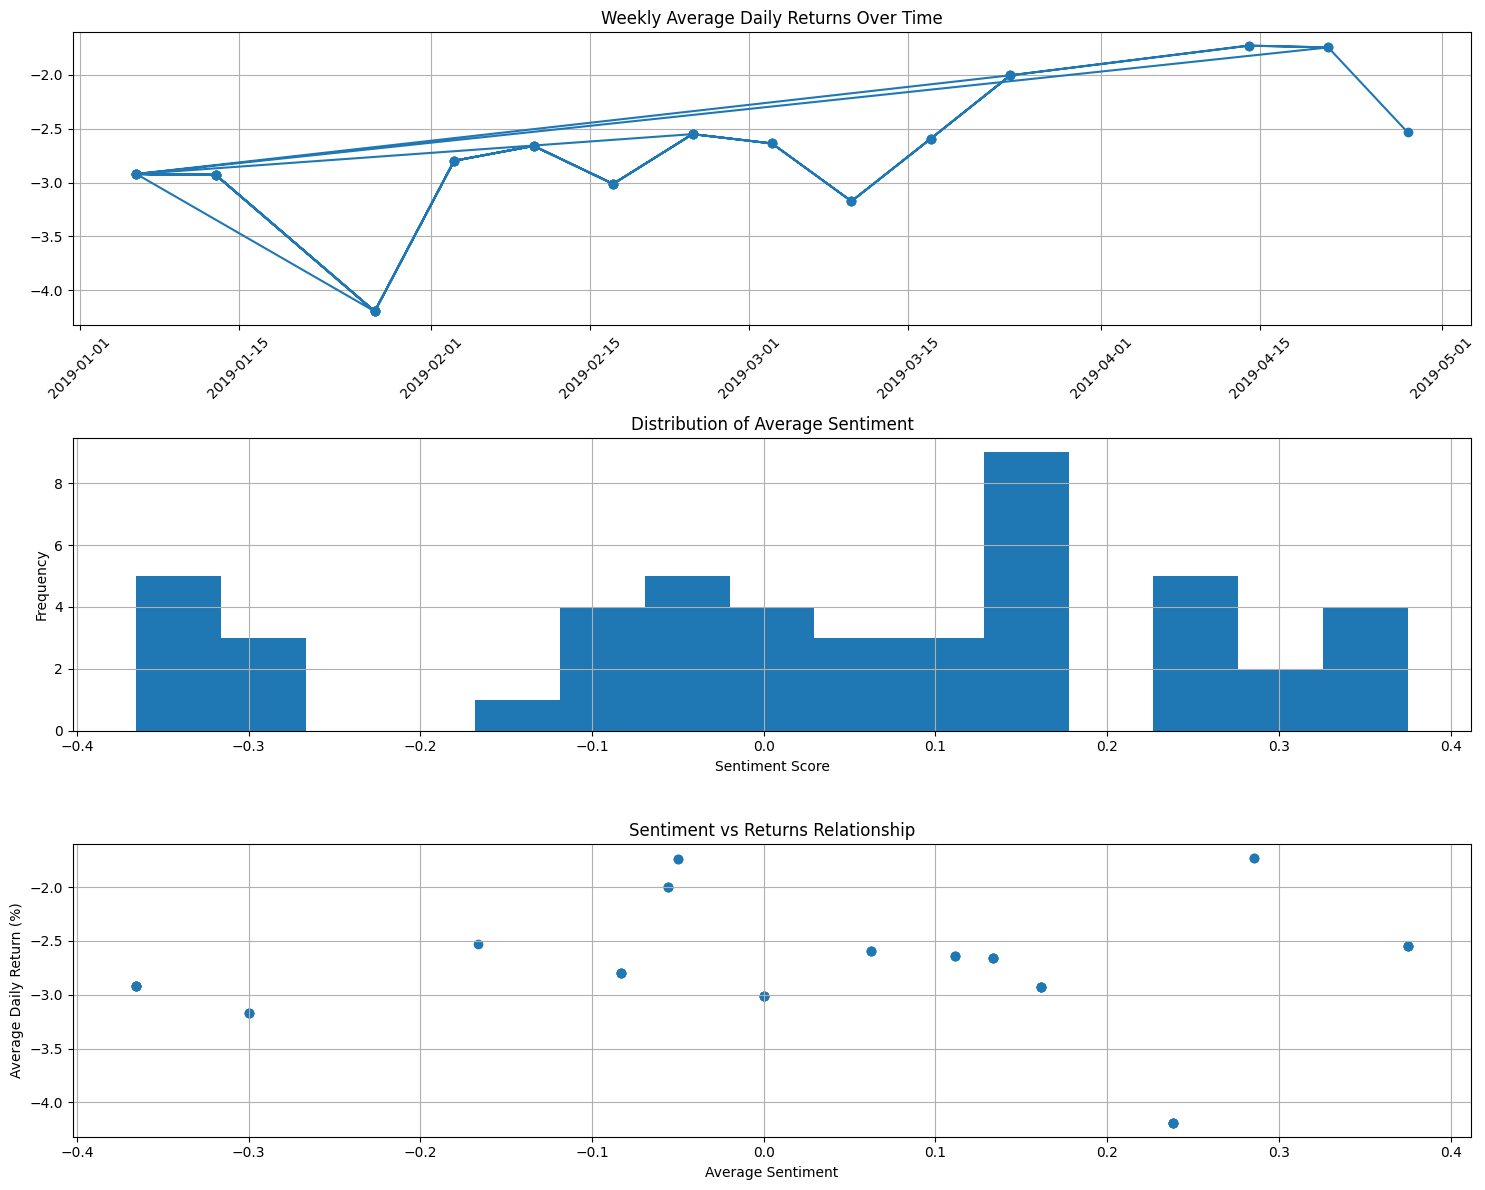


Key Statistics:
Total weeks analyzed: 48

Return Statistics:
count    48.000000
mean     -2.812088
std       0.610749
min      -4.195874
25%      -2.949387
50%      -2.797087
75%      -2.580359
max      -1.727620
Name: avg_daily_return, dtype: float64

Sentiment Statistics:
count    48.000000
mean      0.033936
std       0.216904
min      -0.365385
25%      -0.083333
50%       0.062500
75%       0.161290
max       0.375000
Name: avg_sentiment, dtype: float64

Correlation between sentiment and returns: -0.051

Most frequent positive event themes:
0
Skywork, Broadcom, Lumentum, Qorvo, TSMC stock prices rise    5
Tech sector shows resilience in face of challenges            5
Sprint Samsung 5G phone release                               5
Verizon announces similar plan                                5
Austrian tech company list                                    5
Name: count, dtype: int64

Most frequent negative event themes:
0
Skywork, Broadcom, Lumentum, Qorvo, TSMC stock prices drop 

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the complete dataset
all_summaries_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weekly_summaries_complete.csv')
all_summaries_df['week'] = pd.to_datetime(all_summaries_df['week'])

# Create visualization
plt.figure(figsize=(15, 12))

# Plot 1: Weekly Returns Over Time
plt.subplot(3,1,1)
plt.plot(all_summaries_df['week'], all_summaries_df['avg_daily_return'], marker='o')
plt.title('Weekly Average Daily Returns Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Plot 2: Sentiment Distribution
plt.subplot(3,1,2)
plt.hist(all_summaries_df['avg_sentiment'], bins=15)
plt.title('Distribution of Average Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)

# Plot 3: Sentiment vs Returns Scatter
plt.subplot(3,1,3)
plt.scatter(all_summaries_df['avg_sentiment'], all_summaries_df['avg_daily_return'])
plt.title('Sentiment vs Returns Relationship')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Daily Return (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print key statistics
print("\nKey Statistics:")
print(f"Total weeks analyzed: {len(all_summaries_df)}")
print("\nReturn Statistics:")
print(all_summaries_df['avg_daily_return'].describe())
print("\nSentiment Statistics:")
print(all_summaries_df['avg_sentiment'].describe())

# Calculate correlation
correlation = all_summaries_df['avg_sentiment'].corr(all_summaries_df['avg_daily_return'])
print(f"\nCorrelation between sentiment and returns: {correlation:.3f}")

# Analyze event impact
pos_events = pd.DataFrame([event for events in all_summaries_df['Positive_Events'] for event in eval(events)])
neg_events = pd.DataFrame([event for events in all_summaries_df['Negative_Events'] for event in eval(events)])

print("\nMost frequent positive event themes:")
print(pos_events[0].value_counts().head())
print("\nMost frequent negative event themes:")
print(neg_events[0].value_counts().head())

#### **Comprehensive analysis:**

1. **Returns Trend Analysis (Top Graph)**:
- Overall improving trend from January to April 2019
- Significant drop in early February (around -4.2%)
- Recovery phase from February to April
- Best performing period in mid-April (-1.7%)
- Recent decline at end of period (-2.5%)

2. **Sentiment Distribution (Middle Graph)**:
- Right-skewed distribution with peak at 0.2
- Multiple sentiment clusters:
  * Negative cluster around -0.3
  * Neutral cluster around 0
  * Positive cluster around 0.2-0.4
- Higher frequency of positive sentiment overall

3. **Sentiment vs Returns Relationship (Bottom Graph)**:
- Very weak correlation (-0.051)
- No clear linear relationship
- Wide dispersion of returns across all sentiment levels
- Some of the worst returns occurred during positive sentiment
- Best returns not necessarily aligned with most positive sentiment

4. **Statistical Insights**:
- Mean daily return: -2.81%
- Return volatility (std): 0.61%
- Mean sentiment: 0.034 (slightly positive)
- Sentiment volatility (std): 0.217
- Wide return range: -4.20% to -1.73%

5. **Key Market Events**:
- Recurring positive themes:
  * Tech sector resilience
  * 5G technology developments (Sprint/Samsung/Verizon)
  * Stock price recoveries in key companies
- Recurring negative themes:
  * Tech sector aftermarket declines
  * Stock price drops in major companies
  * Consistent pattern of market impacts

This analysis suggests that while sentiment was generally positive, returns remained consistently negative, indicating other factors (like macroeconomic conditions or sector-specific issues) were more influential on price action than sentiment during this period.

#### **Key Findings from Data Analysis:**

**Return Patterns**


- Average daily returns were mostly negative (-2.5% to -3.0%)
- Highest negative return weeks coincided with major tech sector events
- Some recovery periods showed positive momentum despite negative returns


**Sentiment Analysis**


- Mixed sentiment throughout the period
- Positive sentiment didn't always correlate with better returns
- Market appeared to react more strongly to negative news


**Major Market Themes:**


- Tech sector volatility and revenue warnings
- 5G technology rollout and investments
- Supply chain and semiconductor industry impacts
- Global economic concerns affecting tech stocks


**Trading Volume Patterns:**


- Higher trading volumes during negative sentiment days
- Increased activity around major tech announcements
- Volume spikes during significant price movements

#### **Actionable Recommendations:**

**Investment Strategy:**


- Focus on companies with strong fundamentals despite market sentiment
- Consider semiconductor sector opportunities given recurring importance
- Watch for 5G-related investment opportunities showing resilience


**Risk Management:**


- Implement stop-losses given high market volatility
- Diversify across tech subsectors
- Monitor global economic indicators that impact tech sector


**Opportunity Areas:**


- Track semiconductor demand as leading indicator
- Watch for oversold conditions in quality tech stocks
- Consider entry points during high-volume negative sentiment days

In [ ]:
!pip install nbconvert

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!jupyter nbconvert NLPProject5.ipynb --to html

[NbConvertApp] Converting notebook NLPProject5.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 487, in

In [ ]:
import ipywidgets as widgets

# Close all existing widgets
widgets.Widget.close_all()
